# Consolidación de la base de datos meteorológica con todas las fuentes disponibles 

## Metodología de la consolidación

## Metodología para tratamiento de los datos en esta investigación para preparar los datos para el algoritmo SARIMAX  
1. Lista de atributos o variables meteorológicas. 
     * Temperatura máxima diaria (°C)
     * Temperatura mínima diaria (°C)
     * Temperatura media diaria (°C)
     * Humedad relativa media diaria (%)
     * Humedad específica diaria (kg/kg o g/kg)
     * Velocidad del viento media diaria (m/s)
     * Velocidad del viento máxima diaria (m/s)
     * Velocidad del viento mínima diaria (m/s)
     * Precipitación diaria (mm)
     * Días con lluvia por semana epidemiológica
     * Radiación ultravioleta diaria (UV index)

2. Lista de atributos o variables Epidemiológicas.
     - Casos diarios de dengue.
        - Número de casos de dengue en Caucasia (N_Casos_Total)
        - Número de casos de dengue por barrio (N_Casos_Barrio)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

3. Obtener los datos meteorológicos: 
     - NASAPOWER

Importación de datos de la NASA POWER

In [6]:
# Importar datos
ubicacion_janis = r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos meteorológicos\NASA POWER\Datos_NS_2021-2024.csv"
ubicacion_marco = r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\6_datos_arima\datos_meteorologicos_2021-2024.csv"
df_nasa=pd.read_csv(ubicacion_marco, sep = ';')
df_nasa

,YEAR,DOY,T2M,T2M_MAX,T2M_MIN,QV2M,RH2M,PRECTOTCORR,WS2M,WS2M_MAX,WS2M_MIN,UV
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2024,362,25.83,28.78,23.57,18.48,88.70,2.16,0.19,0.46,0.04,1.79
1457,2024,363,26.05,29.56,23.60,19.30,91.31,9.07,0.14,0.31,0.06,1.51
1458,2024,364,24.92,26.19,23.93,19.24,96.95,8.35,0.15,0.38,0.03,1.70
1459,2024,365,25.11,27.89,23.30,18.50,92.34,1.89,0.13,0.36,0.01,1.65


4. Renombrar los atributos por fuente.

In [7]:
# Renombrar columnas del dataframe nasa
df_nasa.rename(columns={
    'YEAR': 'año',
    'DOY': 'dia',
    'T2M': 'temp (NASA)',
    'T2M_MAX': 'temp_max (NASA)',
    'T2M_MIN': 'temp_min (NASA)',
    'QV2M': 'hum_esp (NASA)',
    'RH2M': 'hum_rel (NASA)',
    'PRECTOTCORR': 'prec (NASA)',
    'WS2M': 'vel_vi (NASA)',
    'WS2M_MAX': 'vel_vi_max (NASA)',
    'WS2M_MIN': 'vel_vi_min (NASA)',
    'UV': 'uv (NASA)'
}, inplace=True)
df_nasa

,año,dia,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021,1,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021,2,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021,3,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021,4,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021,5,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2024,362,25.83,28.78,23.57,18.48,88.70,2.16,0.19,0.46,0.04,1.79
1457,2024,363,26.05,29.56,23.60,19.30,91.31,9.07,0.14,0.31,0.06,1.51
1458,2024,364,24.92,26.19,23.93,19.24,96.95,8.35,0.15,0.38,0.03,1.70
1459,2024,365,25.11,27.89,23.30,18.50,92.34,1.89,0.13,0.36,0.01,1.65


# 5. Ordenar los datos meteorológicos cronológicamente en formato DD-MM-AAAA

In [8]:
# Asegurar que las columnas 'año' y 'dia' sean numéricas 
df_nasa["año"] = df_nasa["año"].astype(int)
df_nasa["dia"] = df_nasa["dia"].astype(int)

# Crear la columna 'fecha' combinando año y día del año 
df_nasa["fecha"] = pd.to_datetime(df_nasa["año"].astype(str), format="%Y") + pd.to_timedelta(df_nasa["dia"] - 1, unit="D")

# Eliminar las columnas originales 'año' y 'dia'
df_nasa = df_nasa.drop(columns=["año", "dia"])

# Reordenar las columnas para que 'fecha' quede al inicio 
cols = ["fecha"] + [c for c in df_nasa.columns if c != "fecha"]
df_nasa = df_nasa[cols]

# Ordenar cronológicamente 
df_nasa = df_nasa.sort_values("fecha").reset_index(drop=True)

df_nasa.head()


,fecha,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021-01-01,28.38,34.96,23.58,16.62,71.66,3.59,0.14,0.24,0.02,2.48
1,2021-01-02,27.44,33.39,23.64,17.98,80.54,12.12,0.10,0.23,0.04,2.18
2,2021-01-03,28.64,35.09,23.84,17.89,75.41,4.03,0.14,0.32,0.07,2.48
3,2021-01-04,28.48,35.05,23.69,15.91,68.69,0.70,0.14,0.25,0.07,2.47
4,2021-01-05,27.84,34.96,22.71,15.16,68.47,0.62,0.16,0.34,0.03,2.30


6. Obtener los datos epidemiológicos

In [9]:
# Cargar datos epidemiológicos (2021-2024)
ubicacion_janis = r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Secretaria de salud\BD_DENGUE_SEC_SALUD_2021-2024.xlsx"
ubicacion_marco = r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\6_datos_arima\datos_epidemiologicos_2021-2024.xlsx"
df_casos = pd.read_excel(ubicacion_marco)
df_casos

,cod_eve,fec_not,semana,año,cod_pre,cod_sub,edad_,uni_med_,nacionali_,nombre_nacionalidad,...,nom_upgd,npais_proce,ndep_proce,nmun_proce,npais_resi,ndep_resi,nmun_resi,ndep_notif,nmun_notif,nreg
0,210,2021-01-11,1,2021,515402201,1,40,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,EL BAGRE,COLOMBIA,ANTIOQUIA,EL BAGRE,ANTIOQUIA,CAUCASIA,1800
1,210,2021-02-06,5,2021,515402201,1,12,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,ZARAGOZA,COLOMBIA,ANTIOQUIA,ZARAGOZA,ANTIOQUIA,CAUCASIA,1791
2,210,2021-02-12,6,2021,2548885069,80,25,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,CUNDINAMARCA,NILO,COLOMBIA,ANTIOQUIA,CAUCASIA,SIN INFORMACIÓN,SIN INFORMACIÓN,1798
3,210,2021-02-16,3,2021,526605568,10,38,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,ENVIGADO,SIN INFORMACIÓN,SIN INFORMACIÓN,1793
4,210,2021-02-19,6,2021,526605568,10,54,1,170,COLOMBIA,...,SIN INFORMACIÓN,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,BOGOTA,BOGOTA,SIN INFORMACIÓN,SIN INFORMACIÓN,1795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,210,2024-12-30,52,2024,515402201,1,6,1,170,COLOMBIA,...,ESE HOSPITAL CESAR URIBE PIEDRAHITA,COLOMBIA,ANTIOQUIA,CAUCASIA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2025-01-01 00:00:00
5486,210,2024-12-31,49,2024,515415510,1,9,1,170,COLOMBIA,...,BIOMED VIDA SAS,COLOMBIA,ANTIOQUIA,ZARAGOZA,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2024-12-31 00:00:00
5487,210,2024-12-31,52,2024,515415510,1,42,1,170,COLOMBIA,...,BIOMED VIDA SAS,COLOMBIA,ANTIOQUIA,MEDELLIN,COLOMBIA,ANTIOQUIA,CAUCASIA,ANTIOQUIA,CAUCASIA,2024-12-31 00:00:00
5488,210,2024-12-31,52,2024,515403817,1,2,1,170,COLOMBIA,...,CLINICA PAJONAL LIMITADA,COLOMBIA,ANTIOQUIA,CACERES,COLOMBIA,ANTIOQUIA,CACERES,ANTIOQUIA,CAUCASIA,2025-01-07 00:00:00


# Práctica de resampling  

### **1. Definición clave:**
- **Semana epidemiológica** (según INS):
  - Comienza en **domingo** y termina en **sábado**.

### **2. Criterio recomendado para el remuestreo:**
1. **Frecuencia de agrupación:**  
   Usar `'W-SUN'` en pandas para alinear las semanas de domingo a sábado.

2. **Función de agregación:**  
   - **Para variables acumulativas** (ej: precipitación):  
     ```python
     df.resample('W-SUN').sum()
     ```
   - **Para variables promedio** (ej: temperatura):  
     ```python
     df.resample('W-SUN').mean()
     ```
   - **Para extremos** (ej: temperatura máxima):  
     ```python
     df.resample('W-SUN').max()
     ```

3. **Etiquetado de fechas:**  
   Asignar cada semana a la **fecha de inicio (domingo)** para mantener consistencia epidemiológica:
   ```python
   df_semanal = df.resample('W-SUN', label='left').sum()
   ```

---

### **3. Implementación en Python:**

In [10]:
# 1. Copiar dataframe original 
df = df_nasa.copy()

# 2. Asegurar que la columna 'fecha' es tipo datetime 
df["fecha"] = pd.to_datetime(df["fecha"])

# 3. Crear columna binaria: día con lluvia (1 si Prec ≥ 1 mm) 
df["lluvia"] = (df["prec (NASA)"] >= 1).astype(int)

# 4. Definir la fecha como índice temporal 
df = df.set_index("fecha")

# 5. Remuestrear de diario a semanal (domingo a sábado) 
df_semanal = df.resample("W-SAT").agg({
    "temp (NASA)": "mean",
    "temp_max (NASA)": "mean",
    "temp_min (NASA)": "mean",
    "hum_esp (NASA)": "mean",
    "hum_rel (NASA)": "mean",
    "prec (NASA)": "sum",        # total semanal de precipitación
    "lluvia": "sum",             # número de días con lluvia
    "vel_vi (NASA)": "mean",
    "vel_vi_max (NASA)": "mean",
    "vel_vi_min (NASA)": "mean",
    "uv (NASA)": "mean"
})

# 6. Renombrar la nueva variable 
df_semanal = df_semanal.rename(columns={"lluvia": "dias_con_lluvia"})

# 7. Reiniciar índice para que 'fecha' vuelva a ser columna
df_semanal = df_semanal.reset_index()

# 8. Agregar número de semana epidemiológica
df_semanal["semana_epidemiologica"] = df_semanal["fecha"].dt.isocalendar().week

# 9. Reordenar las columnas para que la semana quede al lado de la fecha
columnas = ["fecha", "semana_epidemiologica"] + [
    col for col in df_semanal.columns if col not in ["fecha", "semana_epidemiologica"]
]
df_semanal = df_semanal[columnas]

df_semanal.head()


,fecha,semana_epidemiologica,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021-01-02,53,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000
1,2021-01-09,1,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857
2,2021-01-16,2,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286
3,2021-01-23,3,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000
4,2021-01-30,4,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143


## Unión de las bases de datos

In [11]:
# Copiar los df originales
df_casos_ = df_casos.copy()
df_meteo_ = df_semanal.copy()

# Asegurar que las fechas estén en formato datetime
df_casos_["fec_not"] = pd.to_datetime(df_casos_["fec_not"])
df_meteo_["fecha"] = pd.to_datetime(df_meteo_["fecha"])

# Crear columnas de año y semana epidemiológica a partir de fec_not
df_casos_["anio"] = df_casos_["fec_not"].dt.isocalendar().year
df_casos_["semana_epidemiologica"] = df_casos_["fec_not"].dt.isocalendar().week

# Agrupar los casos por año y semana epidemiológica
df_casos_semana = (
    df_casos_
    .groupby(["anio", "semana_epidemiologica"])
    .size()
    .reset_index(name="casos_dengue")
)

# Preparar base meteorológica semanal
df_meteo_["anio"] = df_meteo_["fecha"].dt.year

# Unir ambas bases por año y semana epidemiológica
df_final = pd.merge(
    df_meteo_,
    df_casos_semana,
    on=["anio", "semana_epidemiologica"],
    how="left"
)

# Rellenar semanas sin casos con 0
df_final["casos_dengue"] = df_final["casos_dengue"].fillna(0).astype(int)

# Reordenar columnas: fecha, semana, casos, y luego las variables climáticas
columnas = ["fecha", "semana_epidemiologica", "casos_dengue"] + [
    col for col in df_final.columns if col not in ["fecha", "semana_epidemiologica", "casos_dengue", "anio"]
]

df_final = df_final[columnas]

# Ver primeras filas
df_final.head()


,fecha,semana_epidemiologica,casos_dengue,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143


## Prueba de normalidad

In [ ]:
from scipy.stats import shapiro

# Seleccionar solo las columnas numéricas
numericas = df_final.select_dtypes(include=["float64", "int64"]) # esto elimina la fecha de lso atributos a determinar correlacion

# Aplicar Shapiro-Wilk a cada variable
resultados_normalidad = {}
for col in numericas.columns:
    stat, p = shapiro(numericas[col].dropna())
    resultados_normalidad[col] = {"Estadístico W": stat, "Valor p": p}

# Mostrar resultados
df_normalidad = pd.DataFrame(resultados_normalidad).T
df_normalidad["Normal (p>0.05)"] = df_normalidad["Valor p"] > 0.05
df_normalidad


,Estadístico W,Valor p,Normal (p>0.05)
casos_dengue,0.866598,1.312834e-12,False
temp (NASA),0.944396,3.212551e-07,False
temp_max (NASA),0.908450,4.447641e-10,False
temp_min (NASA),0.984249,1.928965e-02,False
hum_esp (NASA),0.953381,2.421801e-06,False
hum_rel (NASA),0.858170,4.743952e-13,False
prec (NASA),0.871709,2.486737e-12,False
dias_con_lluvia,0.902200,1.688682e-10,False
vel_vi (NASA),0.972908,4.507791e-04,False
vel_vi_max (NASA),0.943663,2.747344e-07,False


# Determinando 

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numerico = df_final.select_dtypes(include=['float64', 'int64']) # esto elimina la fecha de lso atributos a determinar correlacion

# Calcular la matriz de correlación de Spearman
corr_spearman = df_numerico.corr(method='spearman')

# Mostrar matriz en consola
print("Matriz de correlación de Spearman:\n")
corr_spearman


Matriz de correlación de Spearman:



,casos_dengue,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA)
casos_dengue,1.000000,-0.280399,-0.350856,0.069856,0.609483,0.479109,0.263578,0.301368,0.488108,0.495731,-0.177665,-0.250364
temp (NASA),-0.280399,1.000000,0.953041,0.693237,-0.511504,-0.858971,-0.585330,-0.652843,-0.672869,-0.674555,0.261683,0.215042
temp_max (NASA),-0.350856,0.953041,1.000000,0.496170,-0.658962,-0.941632,-0.654137,-0.713499,-0.691100,-0.682460,0.262864,0.135902
temp_min (NASA),0.069856,0.693237,0.496170,1.000000,0.118330,-0.351980,-0.198456,-0.264992,-0.306470,-0.338028,0.125995,0.308971
hum_esp (NASA),0.609483,-0.511504,-0.658962,0.118330,1.000000,0.807073,0.632177,0.625998,0.613143,0.623492,-0.325117,0.041300
hum_rel (NASA),0.479109,-0.858971,-0.941632,-0.351980,0.807073,1.000000,0.723751,0.766534,0.680492,0.687327,-0.308913,-0.087301
prec (NASA),0.263578,-0.585330,-0.654137,-0.198456,0.632177,0.723751,1.000000,0.842333,0.431979,0.380206,-0.049523,0.101342
dias_con_lluvia,0.301368,-0.652843,-0.713499,-0.264992,0.625998,0.766534,0.842333,1.000000,0.484967,0.420471,-0.042737,0.064908
vel_vi (NASA),0.488108,-0.672869,-0.691100,-0.306470,0.613143,0.680492,0.431979,0.484967,1.000000,0.924786,-0.292704,-0.058167
vel_vi_max (NASA),0.495731,-0.674555,-0.682460,-0.338028,0.623492,0.687327,0.380206,0.420471,0.924786,1.000000,-0.491346,-0.091537


# Correlaciones de las variables meteorológicas con la variable objetivo `casos_dengue`.

In [23]:

# Mostrar correlación de cada variable con casos de dengue
print("\nCorrelación de Spearman con casos de dengue:\n")
corr_spearman['casos_dengue'].sort_values(ascending=True)



Correlación de Spearman con casos de dengue:



temp_max (NASA)     -0.350856
temp (NASA)         -0.280399
uv (NASA)           -0.250364
vel_vi_min (NASA)   -0.177665
temp_min (NASA)      0.069856
prec (NASA)          0.263578
dias_con_lluvia      0.301368
hum_rel (NASA)       0.479109
vel_vi (NASA)        0.488108
vel_vi_max (NASA)    0.495731
hum_esp (NASA)       0.609483
casos_dengue         1.000000
Name: casos_dengue, dtype: float64

Tarea: 

Redacte las interpretaciones que de estas correlaciones entre las variables predictoras y la variable objetivo (`casos_dengue`)

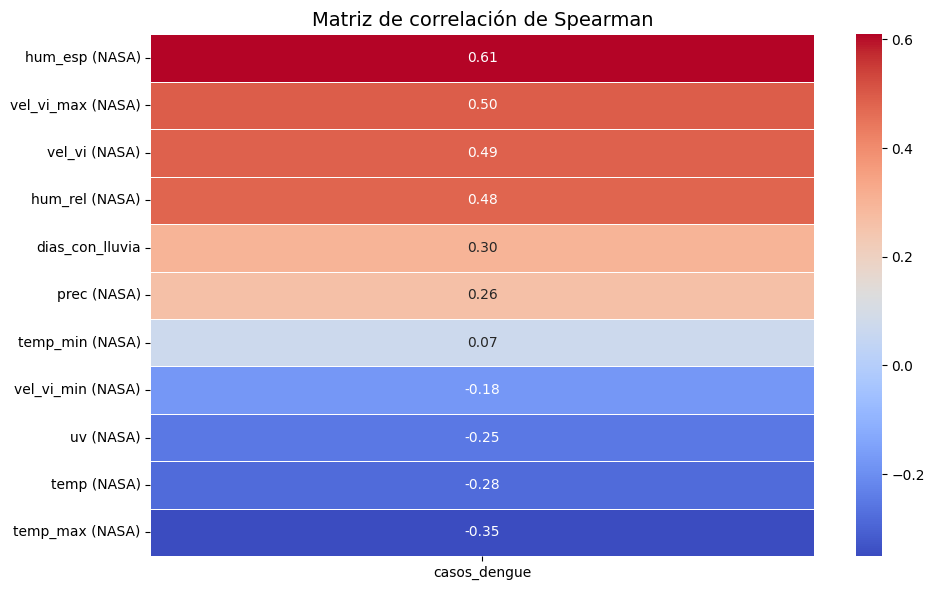

In [34]:

# Crear el mapa de calor
plt.figure(figsize=(10,6))
sns.heatmap(corr_spearman[['casos_dengue']].sort_values(by = 'casos_dengue' , ascending=False)[1:], 
    annot=True,       # Muestra los valores en el mapa
    cmap='coolwarm',  # Escala de color
    fmt=".2f",        # Formato de los valores
    linewidths=0.5
)
plt.title('Matriz de correlación de Spearman', fontsize=14)
plt.tight_layout()
plt.savefig(r"C:\Users\marco\Downloads\correlacion_con_variable_objetivo.png")
plt.show()


# Determinar el número de datos faltantes 



In [35]:
df_final.isnull().sum() 

fecha                    0
semana_epidemiologica    0
casos_dengue             0
temp (NASA)              0
temp_max (NASA)          0
temp_min (NASA)          0
hum_esp (NASA)           0
hum_rel (NASA)           0
prec (NASA)              0
dias_con_lluvia          0
vel_vi (NASA)            0
vel_vi_max (NASA)        0
vel_vi_min (NASA)        0
uv (NASA)                0
dtype: int64

# Tarea 

Redactar interprtación 

In [37]:
from statsmodels.tsa.stattools import adfuller

# --- Aplicar ADF ---
resultado = adfuller(df_final["casos_dengue"])

# --- Mostrar resultados ---
print("ADF Statistic:", resultado[0])
print("p-value:", resultado[1])
print("Número de rezagos:", resultado[2])
print("Número de observaciones:", resultado[3])
print("Valores críticos:")

for key, value in resultado[4].items():
    print(f"   {key}: {value}")

# --- Conclusión ---
if resultado[1] <= 0.05:
    print("\n✔ La serie es ESTACIONARIA (no necesita diferenciación).")
else:
    print("\n✘ La serie NO es estacionaria (sí necesita diferenciación).")


ADF Statistic: 0.39790953813188673
p-value: 0.9814165974529112
Número de rezagos: 15
Número de observaciones: 194
Valores críticos:
   1%: -3.4645146202692527
   5%: -2.8765564361715534
   10%: -2.5747745328940375

✘ La serie NO es estacionaria (sí necesita diferenciación).


# Tarea 

Redacte la interpretación de los resultados de esta celda. 

In [ ]:
df_final.keys()

# Rezagos

In [ ]:
# Generar rezagos climáticos sin rezagos epidemiológicos

variables_climaticas = [
    'temp (NASA)', 'temp_max (NASA)', 'temp_min (NASA)',
    'hum_esp (NASA)', 'hum_rel (NASA)', 'prec (NASA)',
    'dias_con_lluvia', 'vel_vi (NASA)', 'vel_vi_max (NASA)',
    'vel_vi_min (NASA)', 'uv (NASA)'
]

for var in variables_climaticas:
    for lag in range(1, 11):       # ya modificamos a 10 semanas de rezago 
        df_final[f'{var}_lag{lag}'] = df_final[var].shift(lag)


In [40]:
# Guardar el dataframe final con rezagos en excel
ubicacion_janis = r"C:\Users\usuario1\OneDrive - Universidad de Antioquia\UNIVERSIDAD DE ANTIOQUIA\Proyecto SAT Dengue\Bases de datos\Datos meteorológicos\NASA POWER"

ubicacion_marco = r"C:\Users\marco\OneDrive - Universidad de Antioquia\Documentos\2_recursos_ensenanza\6_datos_arima"

df_final.to_excel(
    ubicacion_marco + r"\Datos_meteorológicos_epidemiológicos_con_rezagos.xlsx",
    index=False
)



# Auto correlación (ACF) y Autocorrelación Parcial(PACF)

<Figure size 1000x400 with 0 Axes>

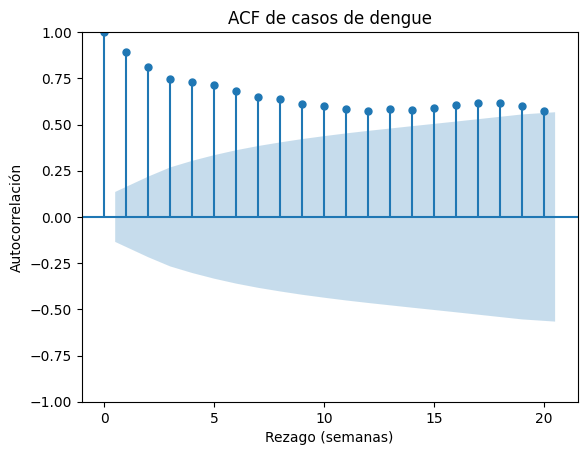

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plot_acf(df_final['casos_dengue'].dropna(), lags=20)
plt.title('ACF de casos de dengue')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Autocorrelación')
plt.savefig(r"C:\Users\marco\Downloads\autocorrelacion.png")
plt.show()

# Tarea

Redactar la interpretación del gráfico enterior.  


<Figure size 1000x500 with 0 Axes>

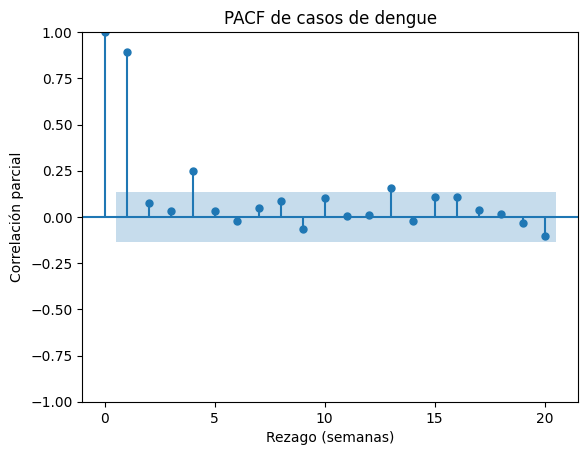

In [42]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plot_pacf(df_final['casos_dengue'].dropna(), lags=20, method='ywm')
plt.title('PACF de casos de dengue')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Correlación parcial')
plt.savefig(r"C:\Users\marco\Downloads\correlacion_parcial.png")
plt.show()


# Tarea

Redactar la interpretación del gráfico enterior.  


#### Ahora hagamos las autocorrelaciones diferenciando la serie

In [43]:
# Añadir la serie diferenciada directamente al dataframe principal copiando el dataframe

df_final['casos_diff'] = df_final['casos_dengue'].diff()

# Opcional: crear un dataframe separado si lo necesitas más adelante
df_final_diff = df_final.copy()
df_final_diff 


,fecha,semana_epidemiologica,casos_dengue,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA),casos_diff
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000,NaN
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857,0.0
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286,1.0
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000,-1.0
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2024-12-07,49,80,26.521429,29.908571,24.115714,19.595714,90.112857,18.76,3,0.157143,0.357143,0.054286,1.762857,28.0
206,2024-12-14,50,143,26.795714,30.527143,23.571429,19.075714,86.485714,7.92,1,0.194286,0.521429,0.021429,1.921429,63.0
207,2024-12-21,51,116,26.630000,29.824286,24.062857,19.545714,89.310000,10.38,3,0.155714,0.425714,0.021429,1.652857,-27.0
208,2024-12-28,52,97,26.025714,29.068571,23.940000,19.185714,90.887143,28.26,7,0.154286,0.365714,0.047143,1.724286,-19.0


In [44]:
df_final 

,fecha,semana_epidemiologica,casos_dengue,temp (NASA),temp_max (NASA),temp_min (NASA),hum_esp (NASA),hum_rel (NASA),prec (NASA),dias_con_lluvia,vel_vi (NASA),vel_vi_max (NASA),vel_vi_min (NASA),uv (NASA),casos_diff
0,2021-01-02,53,0,27.910000,34.175000,23.610000,17.300000,76.100000,15.71,2,0.120000,0.235000,0.030000,2.330000,NaN
1,2021-01-09,1,0,28.252857,34.200000,23.832857,16.308571,70.508571,5.72,1,0.121429,0.244286,0.047143,2.222857,0.0
2,2021-01-16,2,1,28.687143,34.910000,24.195714,17.318571,72.885714,19.15,5,0.117143,0.208571,0.038571,2.254286,1.0
3,2021-01-23,3,0,29.592857,36.372857,24.090000,16.112857,65.122857,0.77,0,0.124286,0.225714,0.045714,2.420000,-1.0
4,2021-01-30,4,0,29.190000,35.978571,24.200000,16.511429,68.068571,12.92,4,0.122857,0.220000,0.035714,2.477143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2024-12-07,49,80,26.521429,29.908571,24.115714,19.595714,90.112857,18.76,3,0.157143,0.357143,0.054286,1.762857,28.0
206,2024-12-14,50,143,26.795714,30.527143,23.571429,19.075714,86.485714,7.92,1,0.194286,0.521429,0.021429,1.921429,63.0
207,2024-12-21,51,116,26.630000,29.824286,24.062857,19.545714,89.310000,10.38,3,0.155714,0.425714,0.021429,1.652857,-27.0
208,2024-12-28,52,97,26.025714,29.068571,23.940000,19.185714,90.887143,28.26,7,0.154286,0.365714,0.047143,1.724286,-19.0


Tareas

1. Diferencie más hasta que encuentre la constante. 
2. Redactar la interpretación del gráfico enterior.  


<Figure size 1000x400 with 0 Axes>

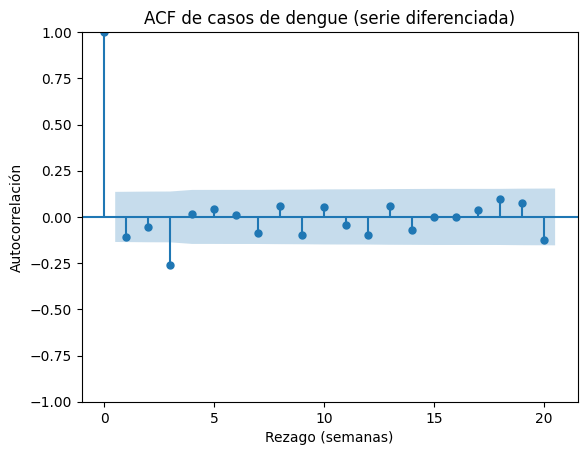

In [45]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plot_acf(df_final_diff['casos_diff'].dropna(), lags=20)
plt.title('ACF de casos de dengue (serie diferenciada)')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Autocorrelación')
plt.show()


# Tarea

Redactar la interpretación del gráfico enterior.  

<Figure size 1000x400 with 0 Axes>

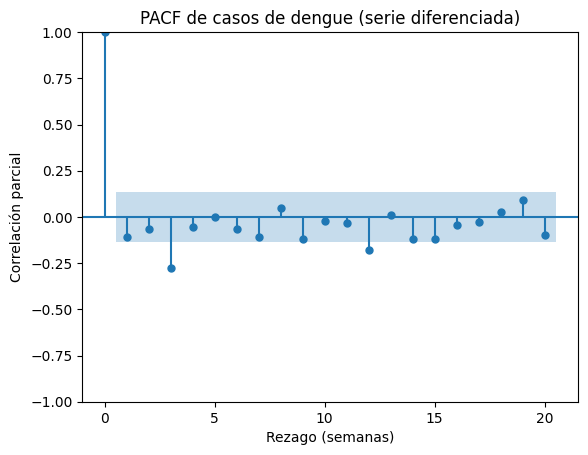

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(10,4))
plot_pacf(df_final_diff['casos_diff'].dropna(), lags=20, method='ywm')
plt.title('PACF de casos de dengue (serie diferenciada)')
plt.xlabel('Rezago (semanas)')
plt.ylabel('Correlación parcial')
plt.show()


# Tarea

Redactar la interpretación del gráfico enterior.  

# Determinación de los atributos meteorológicos con rezago mejor correlacionados con la variable objetivo 





¡Vamos a ello, Marco! 👌
La función `ccf` es **clave** cuando trabajas con **series de tiempo epidemiológicas y meteorológicas**, porque permite estudiar **relaciones temporales con desfases (rezagos)**, no solo asociaciones “simultáneas”.

---

## 📌 ¿Qué es `ccf`?

```python
from statsmodels.tsa.stattools import ccf
```

La función **`ccf` (Cross-Correlation Function)** calcula la **función de correlación cruzada** entre **dos series temporales**.

👉 Responde a la pregunta:

> ¿Cómo se relaciona la serie (x_t) con la serie (y_{t+k}) para distintos rezagos (k)?

---

## 🧠 Definición matemática (intuición)

Sean dos series estacionarias:

[
{x_t}, \quad {y_t}
]

La **correlación cruzada en el rezago (k)** es:

[
\rho_{xy}(k) = \frac{\operatorname{Cov}(x_t, y_{t+k})}
{\sqrt{\operatorname{Var}(x_t)\operatorname{Var}(y_t)}}
]

📌 `ccf(x, y)` calcula esta cantidad para **k = 0, 1, 2, …**

---

## 🧪 Uso básico en Python

```python
from statsmodels.tsa.stattools import ccf

ccf_vals = ccf(x, y)
```

* `x`: serie “causa” (por ejemplo, lluvia)
* `y`: serie “efecto” (por ejemplo, casos de dengue)

📌 **Importante**: `ccf(x, y)[k]` mide la correlación entre
[
x_t \quad \text{y} \quad y_{t+k}
]

---

## 🔍 Tipos de correlaciones que puede obtener `ccf`

Aquí viene lo importante 👇
`ccf` **no devuelve un solo tipo de correlación**, sino una **familia de correlaciones temporales**.

---

### 1️⃣ Correlación cruzada contemporánea (lag = 0)

```python
ccf(x, y)[0]
```

📌 Mide:

[
\text{corr}(x_t, y_t)
]

👉 Asociación **simultánea**, equivalente a:

* Pearson (si ambas series son lineales)
* pero **después de estandarización interna**

---

### 2️⃣ Correlación cruzada con rezago positivo (lag > 0)

```python
ccf(x, y)[k]   # k > 0
```

📌 Mide:

[
\text{corr}(x_t, y_{t+k})
]

👉 Interpretación causal **temporal**:

* `x` **precede** a `y`
* Ejemplo típico:

  * lluvia → (2–6 semanas) → dengue

🧠 **Esta es la más usada en epidemiología climática**

---

### 3️⃣ Correlación cruzada predictiva

Cuando encuentras:

```python
ccf(x, y)[k]  ≠ 0   con k > 0
```

📌 Indica que:

> (x_t) puede servir como **predictor adelantado** de (y)

✔️ Justifica:

* rezagos
* variables exógenas (ARIMAX)
* modelos de alerta temprana

---

### 4️⃣ Correlación cruzada inversa (conceptual)

Aunque `ccf` **no calcula directamente lags negativos**, conceptualmente:

[
\text{corr}(x_t, y_{t-k})
]

equivale a:

```python
ccf(y, x)[k]
```

📌 Esto permite analizar si:

* los casos de dengue “anticipan” cambios climáticos
  (lo cual usualmente no tiene sentido físico, pero sirve como control)

---

### 5️⃣ Correlación cruzada lineal estandarizada

`ccf` **siempre calcula correlación lineal**, equivalente a:

* Pearson
* con series centradas y normalizadas

📌 **No calcula**:

* Spearman
* Kendall
* correlaciones no lineales

⚠️ Si la relación es no monótona, `ccf` puede no detectarla.

---

## ⚠️ Lo que `ccf` NO hace (muy importante)

| Aspecto                   | ¿ccf lo hace? |
| ------------------------- | ------------- |
| Controlar autocorrelación | ❌             |
| Diferenciar series        | ❌             |
| Quitar tendencia          | ❌             |
| Calcular Spearman         | ❌             |
| Evaluar causalidad real   | ❌             |

👉 Por eso **debe usarse con series estacionarias**
(diferenciadas, filtradas o preblanqueadas).

---

## 🧠 Buenas prácticas (nivel investigación)

Antes de usar `ccf`:

```python
x_diff = x.diff().dropna()
y_diff = y.diff().dropna()

ccf_vals = ccf(x_diff, y_diff)
```

O incluso:

* **prewhitening**
* **modelos ARIMAX**
* **pruebas de causalidad de Granger**

---

## 🎓 Resumen conceptual

`ccf` permite estudiar:

| Tipo de correlación  | Qué mide                    |
| -------------------- | --------------------------- |
| Contemporánea        | Relación en el mismo tiempo |
| Cruzada con rezago   | Efecto retardado            |
| Predictiva           | Capacidad de anticipación   |
| Inversa (conceptual) | Dirección temporal          |
| Lineal estandarizada | Asociación lineal           |

---

Si quieres, en el siguiente paso puedo:

* construir un **ejemplo completo con datos de dengue y lluvia**,
* mostrar **cómo elegir el rezago óptimo**,
* o comparar `ccf` con **Granger, ARIMAX y Random Forest con lags**.


In [ ]:
# Crear el mapa de calor
plt.figure(figsize=(10,6))

sns.heatmap(corr_spearman[['casos_dengue']].sort_values(by = 'casos_dengue' , ascending=False)[1:], 
    annot=True,       # Muestra los valores en el mapa
    cmap='coolwarm',  # Escala de color
    fmt=".2f",        # Formato de los valores
    linewidths=0.5
)
plt.title('Matriz de correlación de Spearman', fontsize=14)
plt.tight_layout()
plt.savefig(r"C:\Users\marco\Downloads\correlacion_con_variable_objetivo.png")
plt.show()


CCF

# Seleccion de las variables exógenas 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Lista de variables climáticas (ajusta si cambias nombres)
variables = ['temp (NASA)', 'temp_max (NASA)', 'temp_min (NASA)', 
             'hum_esp (NASA)', 'hum_rel (NASA)', 'prec (NASA)', 
             'dias_con_lluvia', 'vel_vi (NASA)', 'vel_vi_max (NASA)', 
             'vel_vi_min (NASA)', 'uv (NASA)']

# Verifica que existan las columnas
cols_req = ['casos_dengue'] + variables
missing = [c for c in cols_req if c not in df_final.columns]
print("Columnas faltantes:", missing)
print("Tamaño de df_final:", df_final.shape)


Columnas faltantes: []
Tamaño de df_final: (210, 15)


# Visualización de las correlaciones de las variables meteorológicas con retrazo versus la variable objetivo   



In [58]:
from statsmodels.tsa.stattools import ccf # calcula los atributos con retrazo y calcula la correlación con la variable objetivo de una vez
import matplotlib.pyplot as plt
import numpy as np

def ccf_test(df, var, max_lag=12):
    x = df[var].dropna().values
    y = df['casos_dengue'].dropna().values

    c = ccf(x, y)[:max_lag+1]
    lags = np.arange(len(c))

    plt.figure(figsize=(8,4))
    plt.stem(lags, c)
    plt.title(f"CCF de prueba: {var}")
    plt.xlabel("Rezago")
    plt.ylabel("Correlación cruzada")
    plt.xticks(np.arange(0, 13, 1))
    plt.savefig(r"C:\Users\marco\Downloads\correlaciones_atributo_" + var)
    plt.show()


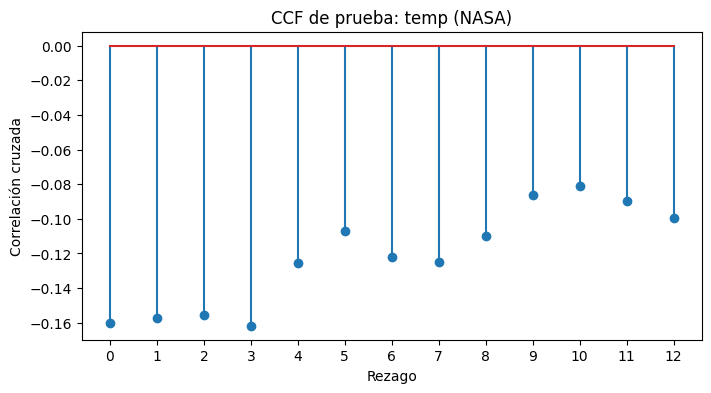

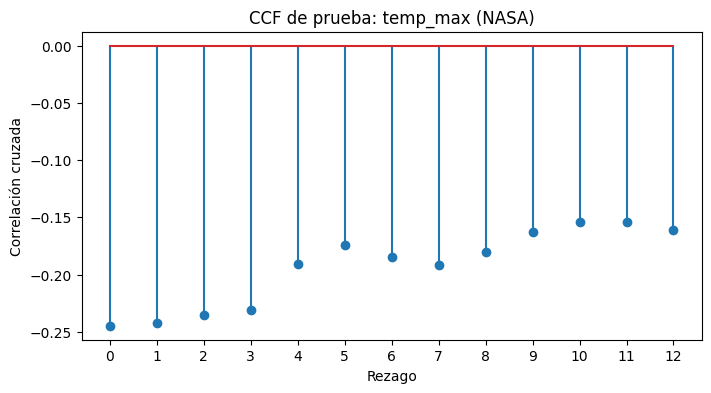

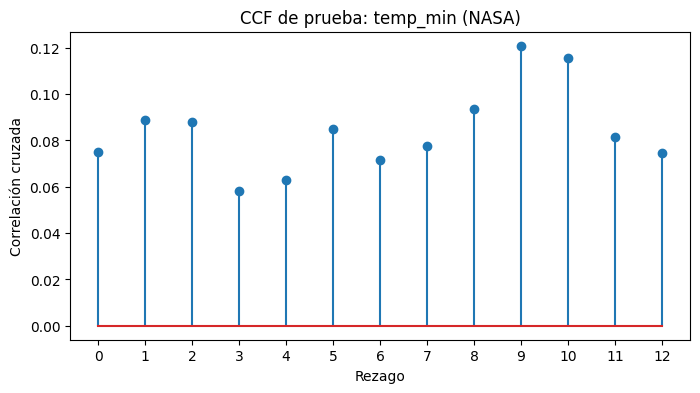

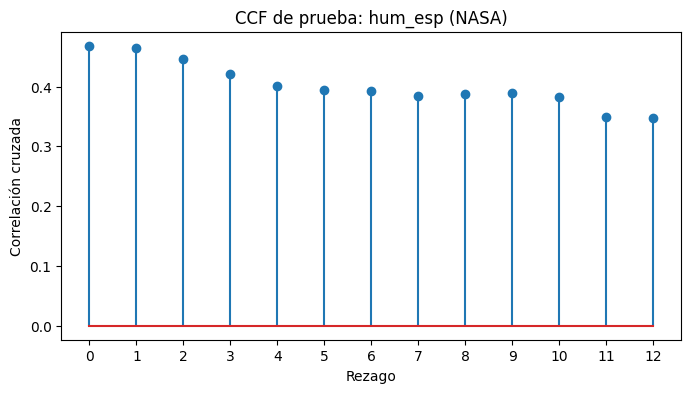

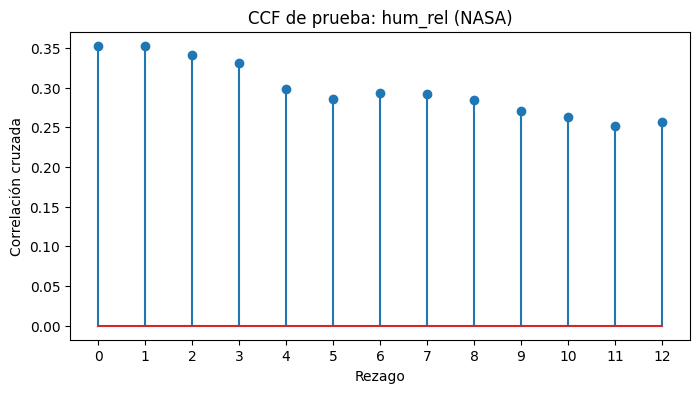

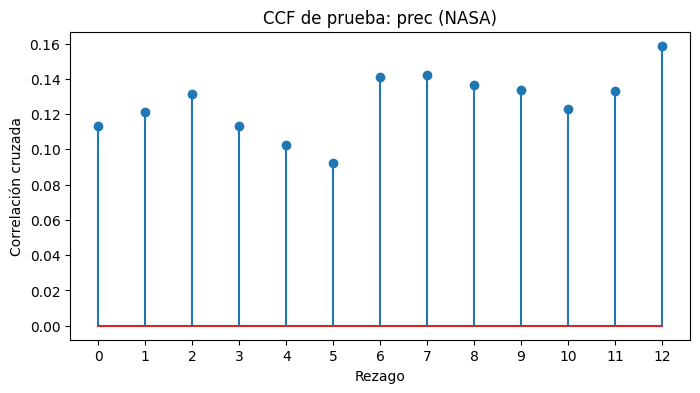

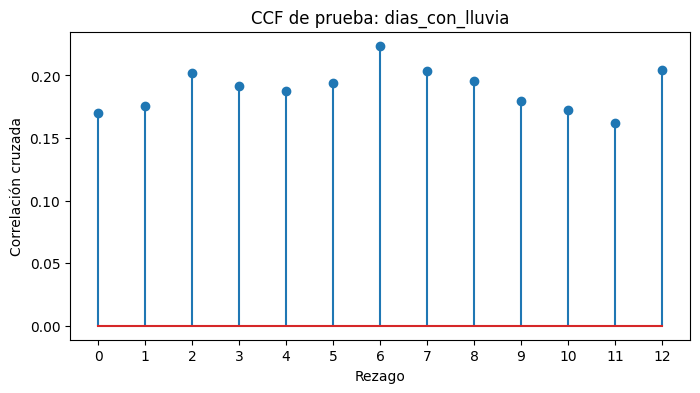

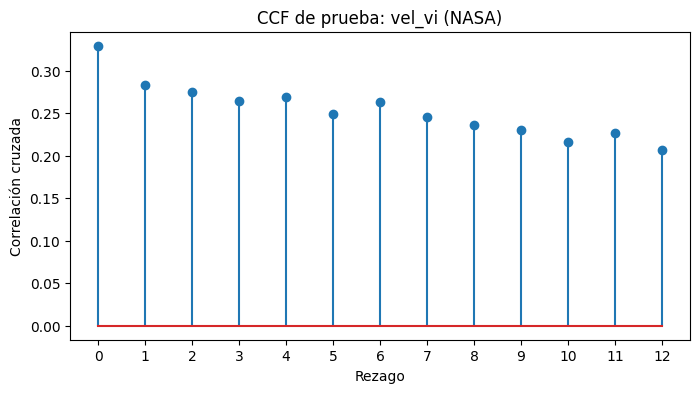

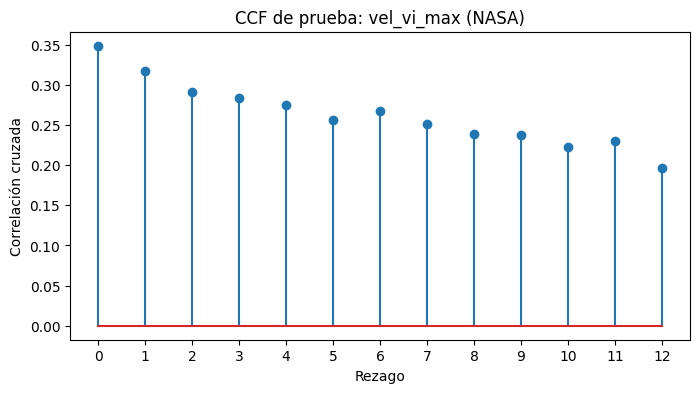

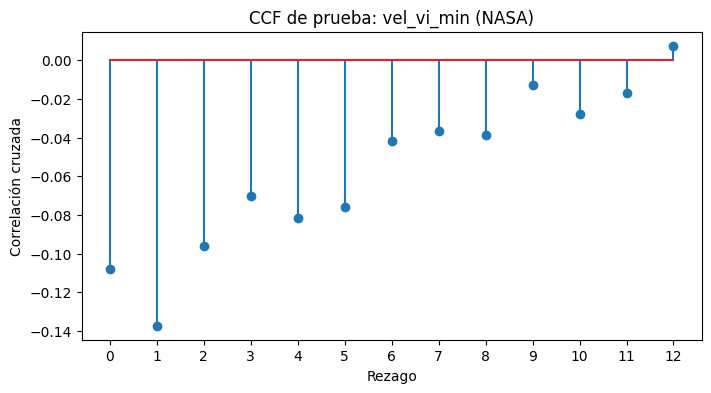

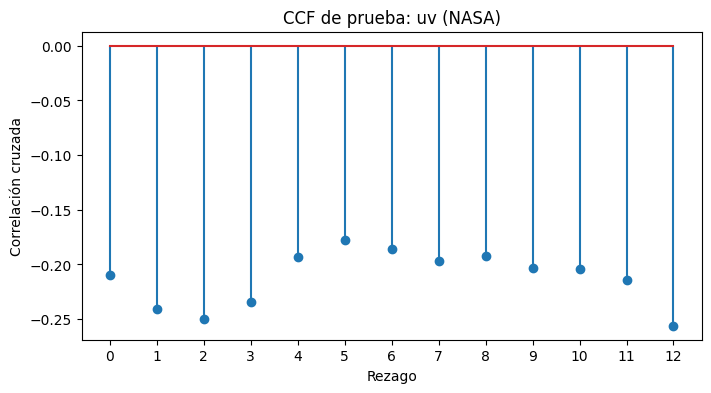

In [59]:
for var in variables: 
    ccf_test(df_final, var, max_lag=12)

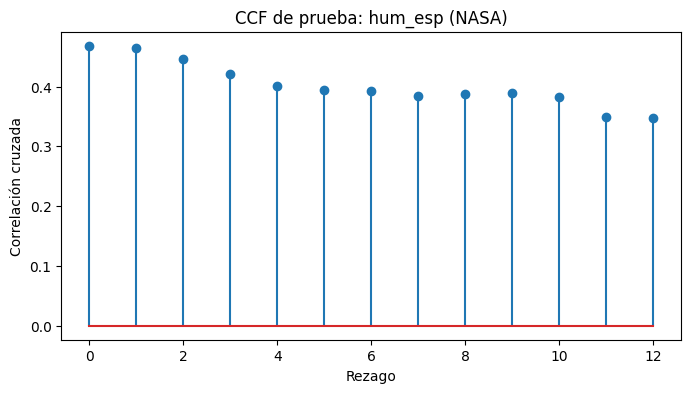

In [54]:
ccf_test(df_final, 'hum_esp (NASA)')


# Tarea 

Conpletar a 11 atributos meteorológicos. 

Del gráfico anterior podemos decir que la humedad específica en las ultimas 4 semanas epidemiológicas esta muy correlacionada positivamente con la variable obetivo de casos de dengue.

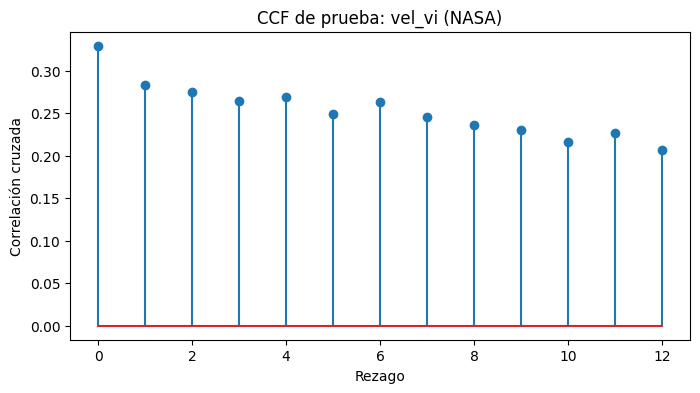

In [50]:
ccf_test(df_final, 'vel_vi (NASA)')

Tarea  

Radactar interpretación. 

Del gráfico anterior podemos decir que la velocidad del viento específica en las ultimas 6 semanas epidemiológicas esta muy correlacionada positivamente con la variable obetivo de casos de dengue.